Epoch: 0, Loss: 0.2843473809799248
Epoch: 100, Loss: 0.19999953239272025
Epoch: 200, Loss: 0.19999951542976654
Epoch: 300, Loss: 0.19999949719500967
Epoch: 400, Loss: 0.19999947754067487
Epoch: 500, Loss: 0.19999945629525104
Epoch: 600, Loss: 0.19999943325853586
Epoch: 700, Loss: 0.19999940819538917
Epoch: 800, Loss: 0.19999938082778163
Epoch: 900, Loss: 0.19999935082457238
Epoch: 1000, Loss: 0.19999931778822208
Epoch: 1100, Loss: 0.19999928123731361
Epoch: 1200, Loss: 0.19999924058325483
Epoch: 1300, Loss: 0.19999919509877348
Epoch: 1400, Loss: 0.19999914387462636
Epoch: 1500, Loss: 0.19999908575904338
Epoch: 1600, Loss: 0.19999901927131453
Epoch: 1700, Loss: 0.1999989424756729
Epoch: 1800, Loss: 0.19999885279246044
Epoch: 1900, Loss: 0.19999874670696657
Epoch: 2000, Loss: 0.19999861930494459
Epoch: 2100, Loss: 0.19999846350141884
Epoch: 2200, Loss: 0.19999826869778958
Epoch: 2300, Loss: 0.1999980183042531
Epoch: 2400, Loss: 0.19999768482862657
Epoch: 2500, Loss: 0.1999972192055235
Ep

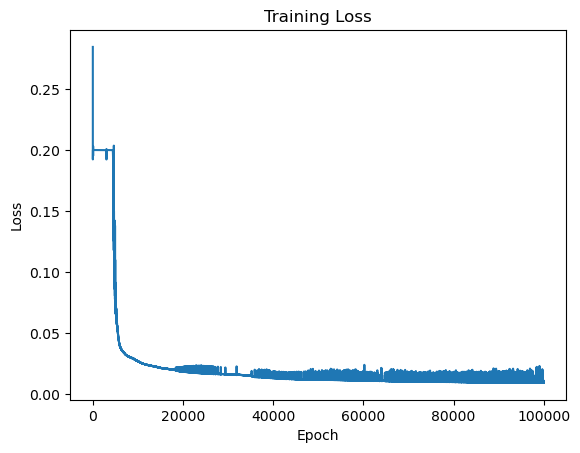

Accuracy: 0.9
Precision: [0.96875    0.85       0.85416667 0.9        0.95      ]
Recall: [0.86111111 0.89473684 0.87234043 0.94736842 0.92682927]
F1-score: [0.91176471 0.87179487 0.86315789 0.92307692 0.9382716 ]
              precision    recall  f1-score   support

           0       0.97      0.86      0.91        36
           1       0.85      0.89      0.87        38
           2       0.85      0.87      0.86        47
           3       0.90      0.95      0.92        38
           4       0.95      0.93      0.94        41

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

class NeuralNetwork(object):
    def __init__(self, inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons, learning_rate):
        self.learning_rate = learning_rate
        self.W_HI = np.random.randn(inputLayerNeurons, hiddenLayerNeurons)
        self.W_HH1 = np.random.randn(hiddenLayerNeurons, hiddenLayerNeurons)
        self.W_HH2 = np.random.randn(hiddenLayerNeurons, hiddenLayerNeurons)
        self.W_HH3 = np.random.randn(hiddenLayerNeurons, hiddenLayerNeurons)
        self.W_OH = np.random.randn(hiddenLayerNeurons, outputLayerNeurons)

    def sigmoid(self, x, der=False):
        if der == True:
            return x * (1 - x)
        else:
            return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        hidden_input = np.dot(X, self.W_HI)
        self.hidden_output = self.sigmoid(hidden_input)

        hidden_input1 = np.dot(self.hidden_output, self.W_HH1)
        self.hidden_output1 = self.sigmoid(hidden_input1)

        hidden_input2 = np.dot(self.hidden_output1, self.W_HH2)
        self.hidden_output2 = self.sigmoid(hidden_input2)

        hidden_input3 = np.dot(self.hidden_output2, self.W_HH3)
        self.hidden_output3 = self.sigmoid(hidden_input3)

        output_input = np.dot(self.hidden_output3, self.W_OH)
        pred = self.sigmoid(output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)

        hidden_error3 = output_delta.dot(self.W_OH.T)
        hidden_delta3 = self.learning_rate * hidden_error3 * self.sigmoid(self.hidden_output3, der=True)

        hidden_error2 = hidden_delta3.dot(self.W_HH3.T)
        hidden_delta2 = self.learning_rate * hidden_error2 * self.sigmoid(self.hidden_output2, der=True)

        hidden_error1 = hidden_delta2.dot(self.W_HH2.T)
        hidden_delta1 = self.learning_rate * hidden_error1 * self.sigmoid(self.hidden_output1, der=True)

        hidden_error = hidden_delta1.dot(self.W_HH1.T)
        hidden_delta = self.learning_rate * hidden_error * self.sigmoid(self.hidden_output, der=True)

        self.W_HI += X.T.dot(hidden_delta)
        self.W_HH1 += self.hidden_output.T.dot(hidden_delta1)
        self.W_HH2 += self.hidden_output1.T.dot(hidden_delta2)
        self.W_HH3 += self.hidden_output2.T.dot(hidden_delta3)
        self.W_OH += self.hidden_output3.T.dot(output_delta)

    def train(self, X, Y, epochs=100000):
        err = []
        for i in range(epochs):
            pred = self.feedForward(X)
            self.backPropagation(X, Y, pred)
            err.append(np.mean(np.square(Y - pred)))

            # Display epoch and loss during training
            if i % 100 == 0:
                print(f"Epoch: {i}, Loss: {err[-1]}")

        # Plot the training loss
        plt.plot(err)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training Loss')
        plt.show()

    def predict(self, X):
        return self.feedForward(X)

# Generate synthetic dataset
num_samples = 1000           
num_features = 3             
num_classes = 5              
n_clusters_per_class = 1     
n_informative = 3            
n_redundant = 0              
n_repeated = 0               

X, Y = make_classification(n_samples=num_samples, 
                           n_features=num_features, 
                           n_classes=num_classes,
                           n_clusters_per_class=n_clusters_per_class, 
                           n_informative=n_informative,
                           n_redundant=n_redundant,
                           n_repeated=n_repeated,
                           random_state=42)

# Encode class labels using one-hot encoding
Y_encoded = np.eye(num_classes)[Y]

# Split dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

# Create neural network instance and train
nn = NeuralNetwork(inputLayerNeurons=num_features, hiddenLayerNeurons=10, outputLayerNeurons=num_classes, learning_rate=0.1)
nn.train(X_train, Y_train, epochs=100000)

# Make predictions on testing set
predictions = nn.predict(X_test)

# Convert predictions to binary values (0 or 1)
binary_predictions = np.argmax(predictions, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(np.argmax(Y_test, axis=1), binary_predictions)
precision = precision_score(np.argmax(Y_test, axis=1), binary_predictions, average=None)
recall = recall_score(np.argmax(Y_test, axis=1), binary_predictions, average=None)
f1 = f1_score(np.argmax(Y_test, axis=1), binary_predictions, average=None)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Classification report
print(classification_report(np.argmax(Y_test, axis=1), binary_predictions))


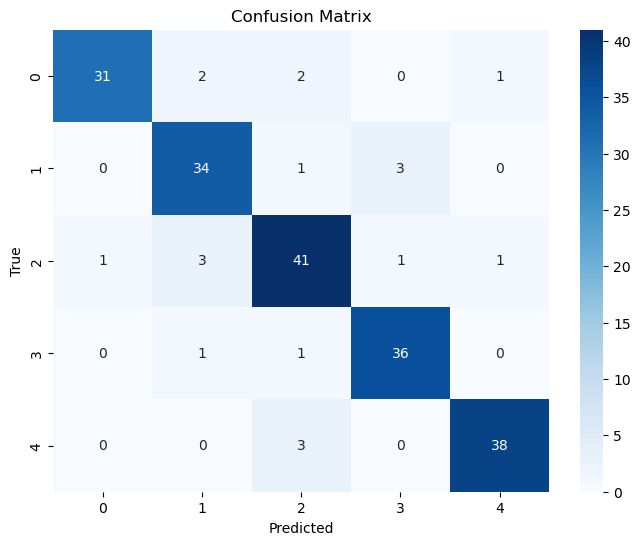

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(np.argmax(Y_test, axis=1), binary_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=np.arange(num_classes), yticklabels=np.arange(num_classes))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
